# Classifying movie reviews: a binary classification example

Data: IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# num_words => only keep 10000 most frequent words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
# each integer on labels is a word on in a dictionary
train_data.shape, train_labels.shape

((25000,), (25000,))

In [7]:
# train_data is a list of reviews: each review is a list of word indices (enconding a sequence of words).
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# encoding back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
# indixes are offset by 3 because 0, 1 and 2 are reserved for padding, start of sequence and unknown
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1646592/1641221 [==============================] - 0s 0us/step


In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the data

In [17]:
# we have lists with different lenghts
# and for that we need to do something about it
len(train_data[0]), len(train_data[1])

(218, 189)

In [3]:
import numpy as np

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # replace the position on zeros data with 1 for 
            # the index that we have
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

The data is ready!!

# Building your model

For this kind of problem (input data = vectors, and lables = scalars) densely-connected (Dense) layers with relu activations works nicely.

Things to decide:
- How many layers to use
- How many units to choose for each layer

For now:
- Two intermediate layers with 16 units (neurons) each
- A third layer that will output the scalar prediction regarding the sentiment of the current review

In [5]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Keras call the "neuron" as units: the dimensionality of representation space of the layer.

# Choosing our optimizer / loss / metrics

For binary classification problems that return a probability, binary_crossentropy is a good choice.

**Crossentropy** is a quantity from the field of Information Theory that measures the distance beetween probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [30]:
# set optimizer, loss and metrics
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Setting a Validation data

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
# training our model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 73us/sample - loss: 0.5369 - accuracy: 0.7634 - val_loss: 0.4077 - val_accuracy: 0.8694
Epoch 2/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.3188 - accuracy: 0.9013 - val_loss: 0.3330 - val_accuracy: 0.8728
Epoch 3/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.2275 - accuracy: 0.9268 - val_loss: 0.3126 - val_accuracy: 0.8757
Epoch 4/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.1783 - accuracy: 0.9453 - val_loss: 0.2810 - val_accuracy: 0.8855
Epoch 5/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.1422 - accuracy: 0.9583 - val_loss: 0.2862 - val_accuracy: 0.8860
Epoch 6/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.1179 - accuracy: 0.9651 - val_loss: 0.2984 - val_accuracy: 0.8848
Epoch 7/20
15000/15000 [==============================] 

In [36]:
# have data about loss, accuracy on training and validation
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
import matplotlib.pyplot as plt

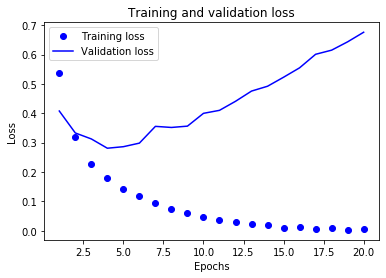

In [38]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# matplotlib horrible plots
# plot epochs vs loss_values
plt.plot(epochs, loss_values, "bo", label="Training loss")
# plot epochs vs val_loss_values
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
# floreamento
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

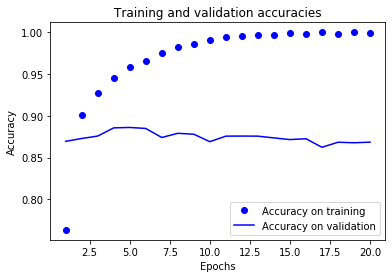

In [45]:
plt.clf()  # clears the figure
# let's do the same for accuracy
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
# plotting
plt.plot(epochs, acc_values, "bo", label="Accuracy on training")
plt.plot(epochs, val_acc_values, "b", label="Accuracy on validation")
plt.title("Training and validation accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This is a clear case of overfitting, our model learn a lot about the training data but not so much to the unseen data.

In [46]:
# let cut off our model after 4 epochs
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=512, epochs=4)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 34us/sample - loss: 0.4497 - accuracy: 0.8256
Epoch 2/4
25000/25000 [==============================] - 1s 22us/sample - loss: 0.2607 - accuracy: 0.9126
Epoch 3/4
25000/25000 [==============================] - 1s 22us/sample - loss: 0.2009 - accuracy: 0.9302
Epoch 4/4
25000/25000 [==============================] - 1s 51us/sample - loss: 0.3058 - accuracy: 0.8781


In [47]:
results

[0.30581198212623595, 0.87812]

In [48]:
# using a trained model to generate predictions on new data
model.predict(x_test)

array([[0.1662441 ],
       [0.99971086],
       [0.700267  ],
       ...,
       [0.1284441 ],
       [0.075778  ],
       [0.45410475]], dtype=float32)

In [49]:
# wrapping up!!! [exercises]

In [51]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=512, epochs=4, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 48us/sample - loss: 0.4506 - accuracy: 0.8232 - val_loss: 0.3017 - val_accuracy: 0.9114
Epoch 2/4
25000/25000 [==============================] - 1s 32us/sample - loss: 0.2764 - accuracy: 0.9072 - val_loss: 0.2271 - val_accuracy: 0.9250
Epoch 3/4
25000/25000 [==============================] - 1s 32us/sample - loss: 0.2186 - accuracy: 0.9255 - val_loss: 0.1840 - val_accuracy: 0.9425
Epoch 4/4
25000/25000 [==============================] - 1s 52us/sample - loss: 0.2811 - accuracy: 0.8880


In [10]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

Train on 25000 samples, validate on 10000 samples
Epoch 1/5
25000/25000 [==============================] - 2s 65us/sample - loss: 0.3432 - accuracy: 0.8600 - val_loss: 0.2301 - val_accuracy: 0.9065
Epoch 2/5
25000/25000 [==============================] - 1s 44us/sample - loss: 0.2069 - accuracy: 0.9210 - val_loss: 0.1376 - val_accuracy: 0.9561
Epoch 3/5
25000/25000 [==============================] - 1s 44us/sample - loss: 0.1589 - accuracy: 0.9412 - val_loss: 0.1009 - val_accuracy: 0.9677
Epoch 4/5
25000/25000 [==============================] - 1s 44us/sample - loss: 0.1222 - accuracy: 0.9554 - val_loss: 0.0716 - val_accuracy: 0.9778
Epoch 5/5
25000/25000 [==============================] - 1s 44us/sample - loss: 0.0920 - accuracy: 0.9672 - val_loss: 0.0710 - val_accuracy: 0.9742


In [11]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 55us/sample - loss: 0.5012 - accuracy: 0.8594


In [12]:
results

[0.5012430922675133, 0.85936]

### Others things to try:
- mse loss function / binary_crossentropy
- tanh for activation / relu